In [1]:
# import required packages
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import os

In [5]:
import os
import pandas as pd

# Script to combine final season data
directory = os.getcwd() + "/data-height-exp"

# Initialize a list to hold DataFrames
dfs = []

# Define a mapping of non-standard column names to standard ones
column_name_mapping = {
    'Height': 'Size',
    'RankHeight': 'SizeRank',
    'HgtC': 'Hgt5',
    'RankHgtC': 'Hgt5Rank',
    'HgtPF': 'Hgt4',
    'RankHgtPF': 'Hgt4Rank',
    'HgtSF': 'Hgt3',
    'RankHgtSF': 'Hgt3Rank',
    'HgtSG': 'Hgt2',
    'RankHgtSG': 'Hgt2Rank',
    'HgtPG': 'Hgt1',
    'RankHgtPG': 'Hgt1Rank',
    'HgtEff': 'HgtEff',
    'RankHgtEff': 'HgtEffRank',
    'Exp': 'Exp',
    'RankExp': 'ExpRank',
    'Bench': 'Bench',
    'RankBench': 'BenchRank',
    'PtsC': 'Pts5',
    'RankPtsC': 'Pts5Rank',
    'PtsPF': 'Pts4',
    'RankPtsPF': 'Pts4Rank',
    'PtsSF': 'Pts3',
    'RankPtsSF': 'Pts3Rank',
    'PtsSG': 'Pts2',
    'RankPtsSG': 'Pts2Rank',
    'PtsPG': 'Pts1',
    'RankPtsPG': 'Pts1Rank',
    'ORC': 'OR5',
    'RankORC': 'OR5Rank',
    'ORPF': 'OR4',
    'RankORPF': 'OR4Rank',
    'ORSF': 'OR3',
    'RankORSF': 'OR3Rank',
    'ORSG': 'OR2',
    'RankORSG': 'OR2Rank',
    'ORPG': 'OR1',
    'RankORPG': 'OR1Rank',
    'DRC': 'DR5',
    'RankDRC': 'DR5Rank',
    'DRPF': 'DR4',
    'RankDRPF': 'DR4Rank',
    'DRSF': 'DR3',
    'RankDRSF': 'DR3Rank',
    'DRSG': 'DR2',
    'RankDRSG': 'DR2Rank',
    'DRPG': 'DR1',
    'RankDRPG': 'DR1Rank'
}


# Loop through all files in the directory
first_file = True
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        print(filename)
        filepath = os.path.join(directory, filename)  # Use os.path.join for better path handling
        # Read each CSV file into a DataFrame
        data = pd.read_csv(filepath)

        # Standardize column names
        data.rename(columns=column_name_mapping, inplace=True)

        if first_file:
            # For the first file, remember the data types
            dtypes = data.dtypes
            first_file = False
        else:
            # For subsequent files, adjust the data types to match the first file
            for column in dtypes.index:
                if column in data.columns:  # Make sure the column exists in the DataFrame
                    data[column] = data[column].astype(dtypes[column])
                else:
                    # Handle missing columns in subsequent files
                    data[column] = pd.Series(dtype=dtypes[column])
        
        # Append the DataFrame to the list
        dfs.append(data)

# Concatenate all DataFrames in the list
combined_data = pd.concat(dfs, ignore_index=True)

# Drop any remaining columns that are completely empty
combined_data.dropna(axis=1, how='all', inplace=True)

# Save the combined DataFrame to a new CSV file
combined_data.to_csv("combined_height_exp.csv", index=False)

df1 = combined_data


height13.csv
height15.csv
height14.csv
height16.csv
height17.csv
height19.csv
height18.csv
height21.csv
height23.csv
height22.csv


In [8]:
dir = os.getcwd()
file_path = dir + "/finaldata_v3_2023.csv" 
df2 = pd.read_csv(file_path)

In [13]:
final_df.columns

Index(['Season', 'TeamName', 'de_TOPct', 'de_ORPct', 'de_FTRate', 'o_eFGPct',
       'o_TOPct', 'o_ORPct', 'o_FTRate', 'Tempo', 'OE', 'DE', 'AdjDE', 'AdjEM',
       'Off_2', 'Off_3', 'Def_2', 'Def_3', 'CONF', 'G', 'W', '2P_D', '3P_O',
       '3P_D', 'WAB', 'POSTSEASON', 'SEED', 'Size', 'SizeRank', 'Hgt5',
       'Hgt5Rank', 'Hgt4', 'Hgt4Rank', 'Hgt3', 'Hgt3Rank', 'Hgt2', 'Hgt2Rank',
       'Hgt1', 'Hgt1Rank', 'HgtEff', 'HgtEffRank', 'Exp', 'ExpRank', 'Bench',
       'BenchRank', 'Pts5', 'Pts5Rank', 'Pts4', 'Pts4Rank', 'Pts3', 'Pts3Rank',
       'Pts2', 'Pts2Rank', 'Pts1', 'Pts1Rank', 'OR5', 'OR5Rank', 'OR4',
       'OR4Rank', 'OR3', 'OR3Rank', 'OR2', 'OR2Rank', 'OR1', 'OR1Rank', 'DR5',
       'DR5Rank', 'DR4', 'DR4Rank', 'DR3', 'DR3Rank', 'DR2', 'DR2Rank', 'DR1',
       'DR1Rank', 'Success'],
      dtype='object')

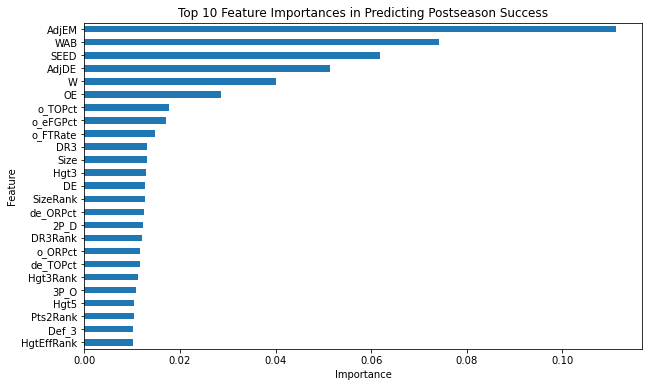

Training Accuracy: 1.0
Test Accuracy: 0.7647058823529411


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

temp = final_df
temp['Success'] = temp['POSTSEASON'].apply(lambda x: 1 if x in ['R32', 'S16', 'E8', 'F4', '2ND', 'Champions'] else 0)

features = ['de_TOPct', 'de_ORPct', 'de_FTRate', 'o_eFGPct',
       'o_TOPct', 'o_ORPct', 'o_FTRate', 'Tempo', 'OE', 'DE', 'AdjDE', 'AdjEM',
       'Off_2', 'Off_3', 'Def_2', 'Def_3', 'W', '2P_D', '3P_O',
       '3P_D', 'WAB', 'SEED', 'Size', 'SizeRank', 'Hgt5',
       'Hgt5Rank', 'Hgt4', 'Hgt4Rank', 'Hgt3', 'Hgt3Rank', 'Hgt2', 'Hgt2Rank',
       'Hgt1', 'Hgt1Rank', 'HgtEff', 'HgtEffRank', 'Exp', 'ExpRank', 'Bench',
       'BenchRank', 'Pts5', 'Pts5Rank', 'Pts4', 'Pts4Rank', 'Pts3', 'Pts3Rank',
       'Pts2', 'Pts2Rank', 'Pts1', 'Pts1Rank', 'OR5', 'OR5Rank', 'OR4',
       'OR4Rank', 'OR3', 'OR3Rank', 'OR2', 'OR2Rank', 'OR1', 'OR1Rank', 'DR5',
       'DR5Rank', 'DR4', 'DR4Rank', 'DR3', 'DR3Rank', 'DR2', 'DR2Rank', 'DR1',
       'DR1Rank']

# Preparing the features and target variable
X = temp[features]  # Using the same features as before
y = temp['Success']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fitting a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicting on the test set and calculating accuracy
y_pred = rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Getting feature importances and selecting the top 10
feature_importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
top_10_features = feature_importances.head(25)

# Plotting top 10 feature importances
plt.figure(figsize=(10, 6))
top_10_features.sort_values().plot(kind='barh')
plt.title('Top 10 Feature Importances in Predicting Postseason Success')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Predicting on the training set and calculating accuracy
y_train_pred = rf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')
